# **Project Name**    - Ford Bike Sharing EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Member Name -**  K. Abhinay

# **Problem Statement**


**1. How long does the average trip take?.**\
**2. Is trip duration affected by weather**\
**3. Does the above depend on if a user is a subscriber or customer**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.distance import geodesic

### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv("201801-fordgobike-tripdata.csv")

### Dataset First View

In [3]:
# Dataset First Look
df.head()

duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:58:31.0530   

   start_station_id                                 start_station_name  \
0               120                               Mission Dolores Park   
1                15  San Francisco Ferry Building (Harry Bridges Pl...   
2               304                               Jackson St at 5th St   
3                75                           Market St at Franklin St   
4                74                              Laguna St at Hayes St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.761420              -122.426435             285   
1               37.795392              -122.394203              15   
2               37.348759              -121.894798             296   
3               37.773793              -122.421239              47   
4               37.776435              -122.426244              19   

                                    end_station_name  end_station_latitude  \
0                         Webster St at O'Farrell St             37.783521   
1  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
2                              5th St at Virginia St             37.325998   
3                              4th St at Harrison St             37.780955   
4                               Post St at Kearny St             37.788975   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.431158     2765  Subscriber             1986.0   
1            -122.394203     2815    Customer                NaN   
2            -121.877120     3039    Customer             1996.0   
3            -122.399749      321    Customer                NaN   
4            -122.403452      617  Subscriber             1991.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3           NaN                      No  
4          Male                      No

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape
original=df.shape[0]

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

member_birth_year          7839
member_gender              7801
duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
bike_share_for_all_trip       0
dtype: int64

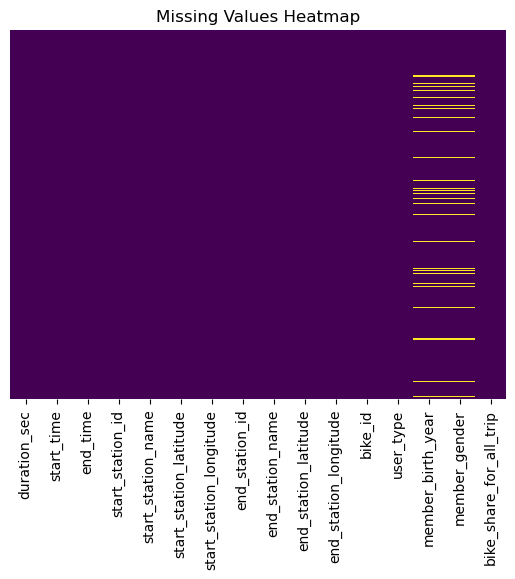

In [8]:
# Visualizing the missing values
sns.heatmap(df.isna(),cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  94802.000000      94802.000000            94802.000000   
mean     870.935930        103.766302               37.773321   
std     2550.596891         87.730464                0.085744   
min       61.000000          3.000000               37.317298   
25%      359.000000         30.000000               37.771662   
50%      555.000000         79.000000               37.781270   
75%      854.000000        160.000000               37.795392   
max    85546.000000        342.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count             94802.000000     94802.00000          94802.000000   
mean               -122.361677       101.00982             37.773536   
std                   0.105253        86.77949              0.085552   
min                -122.444293         3.00000             37.317298   
25%                -122.412408        27.00000             37.773063   
50%                -122.398773        76.00000             37.781752   
75%                -122.390428       157.00000             37.795392   
max                -121.874119       342.00000             37.880222   

       end_station_longitude       bike_id  member_birth_year  
count           94802.000000  94802.000000       86963.000000  
mean             -122.360776   2048.751609        1980.932420  
std                 0.104580   1091.507513          10.803017  
min              -122.444293     11.000000        1900.000000  
25%              -122.411306   1133.000000        1975.000000  
50%              -122.398436   2151.500000        1983.000000  
75%              -122.390428   3015.000000        1989.000000  
max              -121.874119   3744.000000        2000.000000

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for x in df.columns:
    print(f'{x}: {df[x].unique()}')

duration_sec: [75284 85422 71576 ...  3111  2656  2603]
start_time: ['2018-01-31 22:52:35.2390' '2018-01-31 16:13:34.3510'
 '2018-01-31 14:23:55.8890' ... '2018-01-01 00:09:31.7450'
 '2018-01-01 00:07:52.9430' '2018-01-01 00:07:41.0400']
end_time: ['2018-02-01 19:47:19.8240' '2018-02-01 15:57:17.3100'
 '2018-02-01 10:16:52.1160' ... '2018-01-01 00:28:43.1590'
 '2018-01-01 00:19:47.0750' '2018-01-01 00:10:06.2410']
start_station_id: [120  15 304  75  74 236 110  81 134 305  98  89 223 308   7  67  80 247
 312 241 239 182 119 176 123 285 202 141 114  30  99  93  44  76 230  58
  41 144 183  10 338  13 106 160 146  77  85 179 284  14 274 201   4 133
 323  78 109  21 240 108  60 112 250  64  88 171 324   3 116 314 238 194
  37  43 172  25 258  63  61 102 279 197 248 129 105 280 243  66 122 115
  39 181 287 321  97  29  59 195 156 266  20  17 318 137 124  53 196  79
 162  26  19  22 327   5  28   6  47 127 249 100  45 113  36 207  23 175
 158 178 200 311 246 337 259 294  24 186 251 211  90 

## 3. ***Data Wrangling***

### Data Wrangling Code

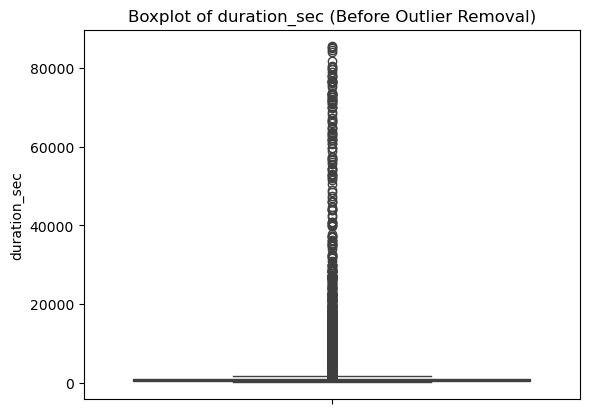

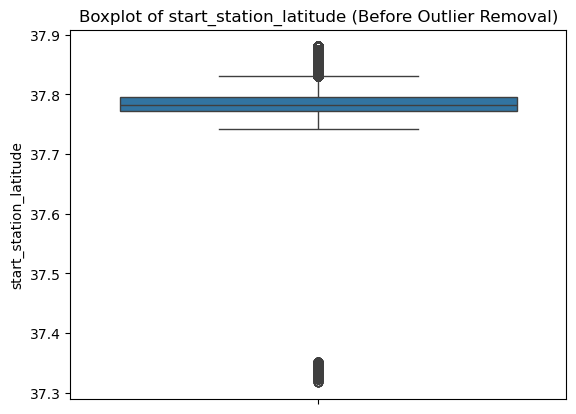

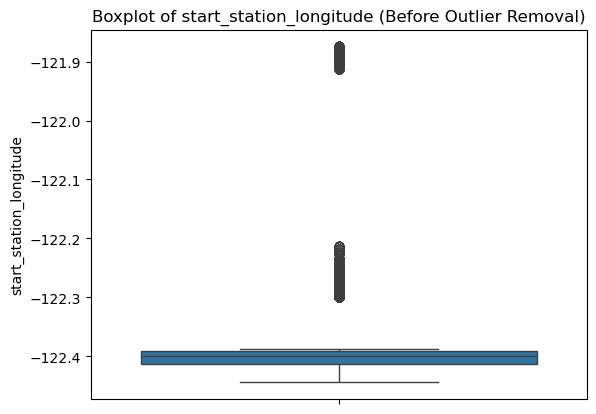

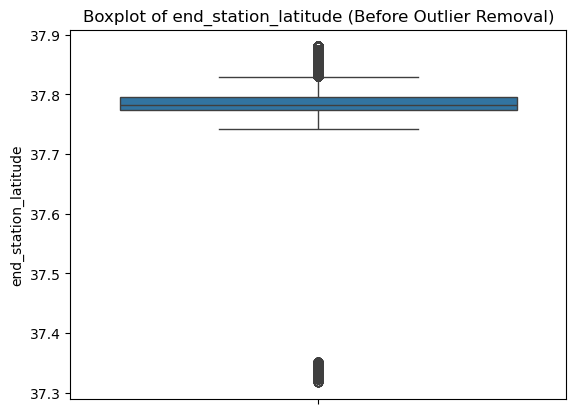

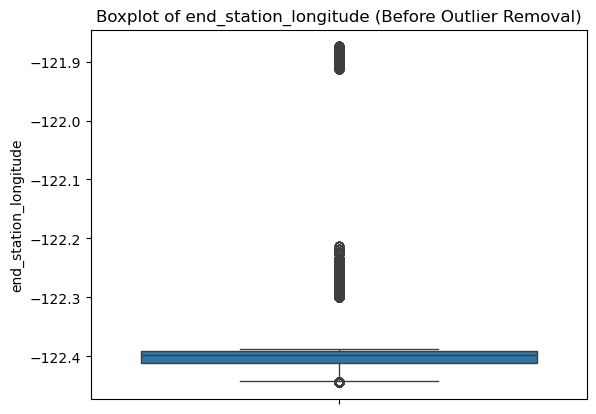

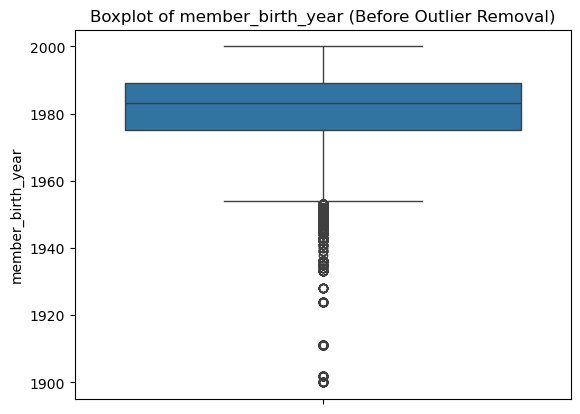

In [12]:
# Detecting Outliers
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and "id" not in col:
        sns.boxplot(y=df[col],whis=1.5)
        plt.title(f'Boxplot of {col} (Before Outlier Removal)')
        plt.show()

In [13]:
# Removing Outliers using IQR method
def outlier(x,df):
    q1=df[x].quantile(0.25)
    q3=df[x].quantile(0.75)

    iqr=q3-q1
    lb=q1-(1.5*iqr)
    up=q3+(1.5*iqr)
    df=df[(df[x]>lb) & (df[x]<up)]
    return df

In [14]:
# Remove Outliers
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and "id" not in col:
        df=outlier(col,df)

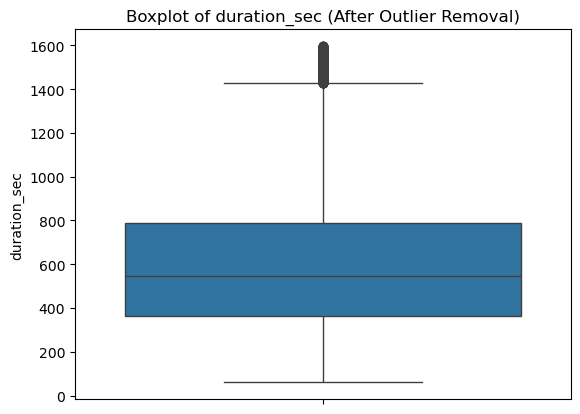

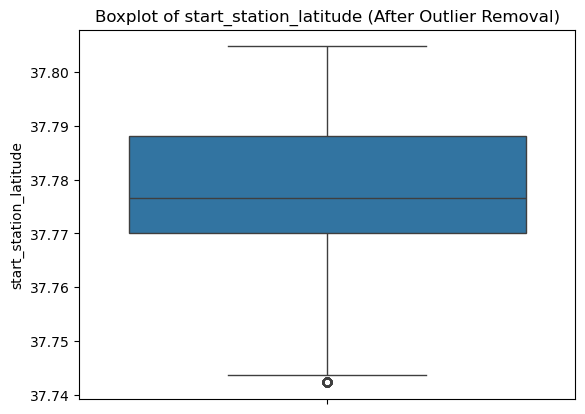

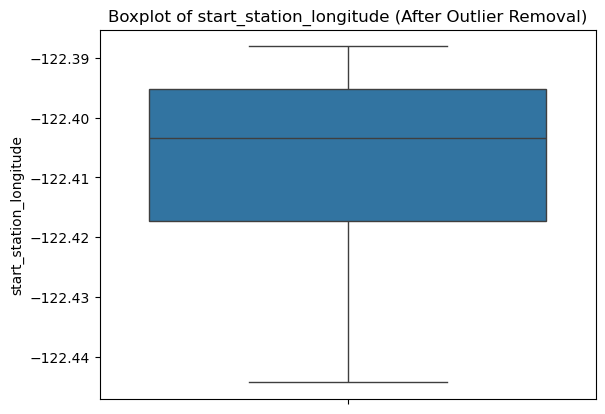

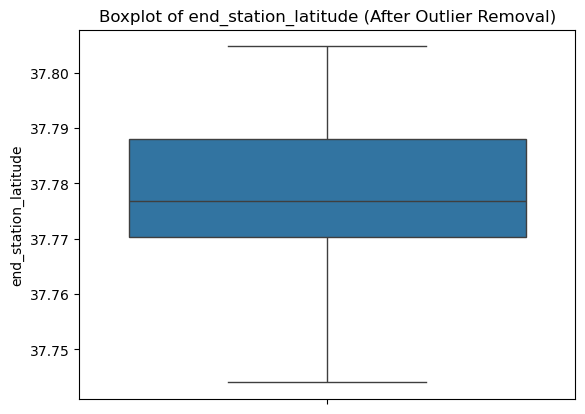

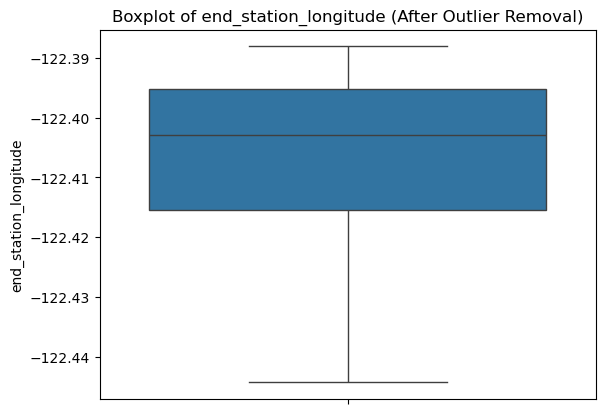

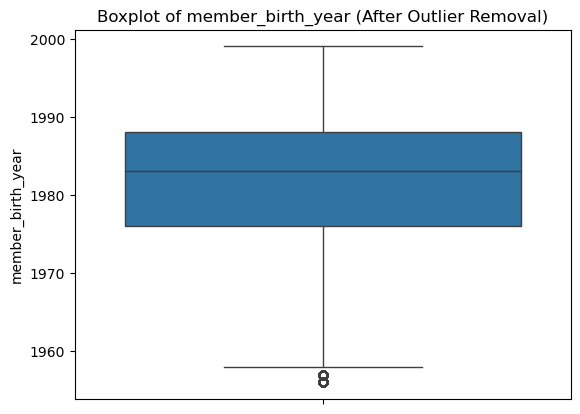

In [15]:
# Checking for outliers again.
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and "id" not in col:
        sns.boxplot(y=df[col],whis=1.5)
        plt.title(f'Boxplot of {col} (After Outlier Removal)')
        plt.show()

In [16]:
df.shape[0]

62354

In [17]:
df.isna().sum().sort_values(ascending=False)

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [18]:
df.head()

duration_sec                start_time                  end_time  \
6            453  2018-01-31 23:53:53.6320  2018-02-01 00:01:26.8050   
7            180  2018-01-31 23:52:09.9030  2018-01-31 23:55:10.8070   
8            996  2018-01-31 23:34:56.0040  2018-01-31 23:51:32.6740   
11           432  2018-01-31 23:34:26.4840  2018-01-31 23:41:39.2970   
12           601  2018-01-31 23:29:46.8320  2018-01-31 23:39:48.0000   

    start_station_id                                start_station_name  \
6                110  17th & Folsom Street Park (17th St at Folsom St)   
7                 81                                Berry St at 4th St   
8                134                            Valencia St at 24th St   
11                89                        Division St at Potrero Ave   
12               223                    16th St Mission BART Station 2   

    start_station_latitude  start_station_longitude  end_station_id  \
6                37.763708              -122.415204             134   
7                37.775880              -122.393170              93   
8                37.752428              -122.420628               4   
11               37.769218              -122.407646              43   
12               37.764765              -122.420091              86   

                                     end_station_name  end_station_latitude  \
6                              Valencia St at 24th St             37.752428   
7                        4th St at Mission Bay Blvd S             37.770407   
8                         Cyril Magnin St at Ellis St             37.785881   
11  San Francisco Public Library (Grove St at Hyde...             37.778768   
12                            Market St at Dolores St             37.769305   

    end_station_longitude  bike_id   user_type  member_birth_year  \
6             -122.420628     3571  Subscriber             1988.0   
7             -122.391198     1403  Subscriber             1980.0   
8             -122.408915     3675  Subscriber             1987.0   
11            -122.415929     2928  Subscriber             1993.0   
12            -122.426826     3016  Subscriber             1957.0   

   member_gender bike_share_for_all_trip  
6           Male                      No  
7           Male                      No  
8           Male                     Yes  
11          Male                      No  
12          Male                      No

In [19]:
# Create new column for minutes
df['duration_min']=df['duration_sec']/60

# dropping unnecessary columns
df.drop(['duration_sec',"start_station_id",'end_station_id','bike_id'],axis=1,inplace=True)

# converted start_time and end_time to datetime
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [20]:
df.head()

start_time                end_time  \
6  2018-01-31 23:53:53.632 2018-02-01 00:01:26.805   
7  2018-01-31 23:52:09.903 2018-01-31 23:55:10.807   
8  2018-01-31 23:34:56.004 2018-01-31 23:51:32.674   
11 2018-01-31 23:34:26.484 2018-01-31 23:41:39.297   
12 2018-01-31 23:29:46.832 2018-01-31 23:39:48.000   

                                  start_station_name  start_station_latitude  \
6   17th & Folsom Street Park (17th St at Folsom St)               37.763708   
7                                 Berry St at 4th St               37.775880   
8                             Valencia St at 24th St               37.752428   
11                        Division St at Potrero Ave               37.769218   
12                    16th St Mission BART Station 2               37.764765   

    start_station_longitude  \
6               -122.415204   
7               -122.393170   
8               -122.420628   
11              -122.407646   
12              -122.420091   

                                     end_station_name  end_station_latitude  \
6                              Valencia St at 24th St             37.752428   
7                        4th St at Mission Bay Blvd S             37.770407   
8                         Cyril Magnin St at Ellis St             37.785881   
11  San Francisco Public Library (Grove St at Hyde...             37.778768   
12                            Market St at Dolores St             37.769305   

    end_station_longitude   user_type  member_birth_year member_gender  \
6             -122.420628  Subscriber             1988.0          Male   
7             -122.391198  Subscriber             1980.0          Male   
8             -122.408915  Subscriber             1987.0          Male   
11            -122.415929  Subscriber             1993.0          Male   
12            -122.426826  Subscriber             1957.0          Male   

   bike_share_for_all_trip  duration_min  
6                       No      7.550000  
7                       No      3.000000  
8                      Yes     16.600000  
11                      No      7.200000  
12                      No     10.016667

In [21]:
# created function to round of the values to 2 decimal places
def rou(x):
    return round(x,2)

In [22]:
df['duration_min']=df['duration_min'].apply(rou)
df['member_birth_year']=df['member_birth_year'].astype(int)
df.head()

start_time                end_time  \
6  2018-01-31 23:53:53.632 2018-02-01 00:01:26.805   
7  2018-01-31 23:52:09.903 2018-01-31 23:55:10.807   
8  2018-01-31 23:34:56.004 2018-01-31 23:51:32.674   
11 2018-01-31 23:34:26.484 2018-01-31 23:41:39.297   
12 2018-01-31 23:29:46.832 2018-01-31 23:39:48.000   

                                  start_station_name  start_station_latitude  \
6   17th & Folsom Street Park (17th St at Folsom St)               37.763708   
7                                 Berry St at 4th St               37.775880   
8                             Valencia St at 24th St               37.752428   
11                        Division St at Potrero Ave               37.769218   
12                    16th St Mission BART Station 2               37.764765   

    start_station_longitude  \
6               -122.415204   
7               -122.393170   
8               -122.420628   
11              -122.407646   
12              -122.420091   

                                     end_station_name  end_station_latitude  \
6                              Valencia St at 24th St             37.752428   
7                        4th St at Mission Bay Blvd S             37.770407   
8                         Cyril Magnin St at Ellis St             37.785881   
11  San Francisco Public Library (Grove St at Hyde...             37.778768   
12                            Market St at Dolores St             37.769305   

    end_station_longitude   user_type  member_birth_year member_gender  \
6             -122.420628  Subscriber               1988          Male   
7             -122.391198  Subscriber               1980          Male   
8             -122.408915  Subscriber               1987          Male   
11            -122.415929  Subscriber               1993          Male   
12            -122.426826  Subscriber               1957          Male   

   bike_share_for_all_trip  duration_min  
6                       No          7.55  
7                       No          3.00  
8                      Yes         16.60  
11                      No          7.20  
12                      No         10.02

In [23]:
df.head()

start_time                end_time  \
6  2018-01-31 23:53:53.632 2018-02-01 00:01:26.805   
7  2018-01-31 23:52:09.903 2018-01-31 23:55:10.807   
8  2018-01-31 23:34:56.004 2018-01-31 23:51:32.674   
11 2018-01-31 23:34:26.484 2018-01-31 23:41:39.297   
12 2018-01-31 23:29:46.832 2018-01-31 23:39:48.000   

                                  start_station_name  start_station_latitude  \
6   17th & Folsom Street Park (17th St at Folsom St)               37.763708   
7                                 Berry St at 4th St               37.775880   
8                             Valencia St at 24th St               37.752428   
11                        Division St at Potrero Ave               37.769218   
12                    16th St Mission BART Station 2               37.764765   

    start_station_longitude  \
6               -122.415204   
7               -122.393170   
8               -122.420628   
11              -122.407646   
12              -122.420091   

                                     end_station_name  end_station_latitude  \
6                              Valencia St at 24th St             37.752428   
7                        4th St at Mission Bay Blvd S             37.770407   
8                         Cyril Magnin St at Ellis St             37.785881   
11  San Francisco Public Library (Grove St at Hyde...             37.778768   
12                            Market St at Dolores St             37.769305   

    end_station_longitude   user_type  member_birth_year member_gender  \
6             -122.420628  Subscriber               1988          Male   
7             -122.391198  Subscriber               1980          Male   
8             -122.408915  Subscriber               1987          Male   
11            -122.415929  Subscriber               1993          Male   
12            -122.426826  Subscriber               1957          Male   

   bike_share_for_all_trip  duration_min  
6                       No          7.55  
7                       No          3.00  
8                      Yes         16.60  
11                      No          7.20  
12                      No         10.02

In [24]:
# Extracting year, month, day, hour from start_time for EDA purpose
df['trip_hour']=df['start_time'].dt.hour
df['trip_day']=df['start_time'].dt.day
df['trip_month']=df['start_time'].dt.month

df.head()

start_time                end_time  \
6  2018-01-31 23:53:53.632 2018-02-01 00:01:26.805   
7  2018-01-31 23:52:09.903 2018-01-31 23:55:10.807   
8  2018-01-31 23:34:56.004 2018-01-31 23:51:32.674   
11 2018-01-31 23:34:26.484 2018-01-31 23:41:39.297   
12 2018-01-31 23:29:46.832 2018-01-31 23:39:48.000   

                                  start_station_name  start_station_latitude  \
6   17th & Folsom Street Park (17th St at Folsom St)               37.763708   
7                                 Berry St at 4th St               37.775880   
8                             Valencia St at 24th St               37.752428   
11                        Division St at Potrero Ave               37.769218   
12                    16th St Mission BART Station 2               37.764765   

    start_station_longitude  \
6               -122.415204   
7               -122.393170   
8               -122.420628   
11              -122.407646   
12              -122.420091   

                                     end_station_name  end_station_latitude  \
6                              Valencia St at 24th St             37.752428   
7                        4th St at Mission Bay Blvd S             37.770407   
8                         Cyril Magnin St at Ellis St             37.785881   
11  San Francisco Public Library (Grove St at Hyde...             37.778768   
12                            Market St at Dolores St             37.769305   

    end_station_longitude   user_type  member_birth_year member_gender  \
6             -122.420628  Subscriber               1988          Male   
7             -122.391198  Subscriber               1980          Male   
8             -122.408915  Subscriber               1987          Male   
11            -122.415929  Subscriber               1993          Male   
12            -122.426826  Subscriber               1957          Male   

   bike_share_for_all_trip  duration_min  trip_hour  trip_day  trip_month  
6                       No          7.55         23        31           1  
7                       No          3.00         23        31           1  
8                      Yes         16.60         23        31           1  
11                      No          7.20         23        31           1  
12                      No         10.02         23        31           1

In [25]:
# Function to calculate distance using geopy
def calculate_distance(row):
    start_coords = (row['start_station_latitude'], row['start_station_longitude'])
    end_coords = (row['end_station_latitude'], row['end_station_longitude'])
    return geodesic(start_coords, end_coords).km

# Apply to DataFrame
df['trip_distance_km'] = df.apply(calculate_distance, axis=1)
df['trip_distance_km'] = df['trip_distance_km'].apply(rou)

In [26]:
df.head()

start_time                end_time  \
6  2018-01-31 23:53:53.632 2018-02-01 00:01:26.805   
7  2018-01-31 23:52:09.903 2018-01-31 23:55:10.807   
8  2018-01-31 23:34:56.004 2018-01-31 23:51:32.674   
11 2018-01-31 23:34:26.484 2018-01-31 23:41:39.297   
12 2018-01-31 23:29:46.832 2018-01-31 23:39:48.000   

                                  start_station_name  start_station_latitude  \
6   17th & Folsom Street Park (17th St at Folsom St)               37.763708   
7                                 Berry St at 4th St               37.775880   
8                             Valencia St at 24th St               37.752428   
11                        Division St at Potrero Ave               37.769218   
12                    16th St Mission BART Station 2               37.764765   

    start_station_longitude  \
6               -122.415204   
7               -122.393170   
8               -122.420628   
11              -122.407646   
12              -122.420091   

                                     end_station_name  end_station_latitude  \
6                              Valencia St at 24th St             37.752428   
7                        4th St at Mission Bay Blvd S             37.770407   
8                         Cyril Magnin St at Ellis St             37.785881   
11  San Francisco Public Library (Grove St at Hyde...             37.778768   
12                            Market St at Dolores St             37.769305   

    end_station_longitude   user_type  member_birth_year member_gender  \
6             -122.420628  Subscriber               1988          Male   
7             -122.391198  Subscriber               1980          Male   
8             -122.408915  Subscriber               1987          Male   
11            -122.415929  Subscriber               1993          Male   
12            -122.426826  Subscriber               1957          Male   

   bike_share_for_all_trip  duration_min  trip_hour  trip_day  trip_month  \
6                       No          7.55         23        31           1   
7                       No          3.00         23        31           1   
8                      Yes         16.60         23        31           1   
11                      No          7.20         23        31           1   
12                      No         10.02         23        31           1   

    trip_distance_km  
6               1.34  
7               0.63  
8               3.85  
11              1.29  
12              0.78

In [27]:
df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','start_time','end_time'],axis=1,inplace=True)
df.head()

start_station_name  \
6   17th & Folsom Street Park (17th St at Folsom St)   
7                                 Berry St at 4th St   
8                             Valencia St at 24th St   
11                        Division St at Potrero Ave   
12                    16th St Mission BART Station 2   

                                     end_station_name   user_type  \
6                              Valencia St at 24th St  Subscriber   
7                        4th St at Mission Bay Blvd S  Subscriber   
8                         Cyril Magnin St at Ellis St  Subscriber   
11  San Francisco Public Library (Grove St at Hyde...  Subscriber   
12                            Market St at Dolores St  Subscriber   

    member_birth_year member_gender bike_share_for_all_trip  duration_min  \
6                1988          Male                      No          7.55   
7                1980          Male                      No          3.00   
8                1987          Male                     Yes         16.60   
11               1993          Male                      No          7.20   
12               1957          Male                      No         10.02   

    trip_hour  trip_day  trip_month  trip_distance_km  
6          23        31           1              1.34  
7          23        31           1              0.63  
8          23        31           1              3.85  
11         23        31           1              1.29  
12         23        31           1              0.78

In [28]:
df['user_type'].value_counts()

user_type
Subscriber    58374
Customer       3980
Name: count, dtype: int64

In [29]:
sub_df=df[df['user_type']=='Subscriber']
cus_df=df[df['user_type']=='Customer']

In [30]:
top_start_station=df['start_station_name'].value_counts().to_frame().head(10)
top_start_station.reset_index(inplace=True)
top_start_station.columns=['start_station_name','count']
top_start_station

start_station_name  count
0     San Francisco Caltrain (Townsend St at 4th St)   2004
1                                 Berry St at 4th St   1853
2                               Market St at 10th St   1811
3  San Francisco Caltrain Station 2  (Townsend St...   1748
4  San Francisco Ferry Building (Harry Bridges Pl...   1660
5                            Steuart St at Market St   1499
6   Montgomery St BART Station (Market St at 2nd St)   1494
7                              Howard St at Beale St   1448
8       Powell St BART Station (Market St at 4th St)   1373
9                      The Embarcadero at Sansome St   1297

In [31]:
top_end_station=df['end_station_name'].value_counts().to_frame().head(10)
top_end_station.reset_index(inplace=True)
top_end_station.columns=['end_station_name','count']
top_end_station

end_station_name  count
0     San Francisco Caltrain (Townsend St at 4th St)   2643
1  San Francisco Caltrain Station 2  (Townsend St...   2260
2   Montgomery St BART Station (Market St at 2nd St)   1939
3  San Francisco Ferry Building (Harry Bridges Pl...   1938
4                                 Berry St at 4th St   1806
5                               Market St at 10th St   1660
6                      The Embarcadero at Sansome St   1512
7       Powell St BART Station (Market St at 4th St)   1446
8                            Steuart St at Market St   1397
9                                S Park St at 3rd St   1247

In [32]:
df.head()

start_station_name  \
6   17th & Folsom Street Park (17th St at Folsom St)   
7                                 Berry St at 4th St   
8                             Valencia St at 24th St   
11                        Division St at Potrero Ave   
12                    16th St Mission BART Station 2   

                                     end_station_name   user_type  \
6                              Valencia St at 24th St  Subscriber   
7                        4th St at Mission Bay Blvd S  Subscriber   
8                         Cyril Magnin St at Ellis St  Subscriber   
11  San Francisco Public Library (Grove St at Hyde...  Subscriber   
12                            Market St at Dolores St  Subscriber   

    member_birth_year member_gender bike_share_for_all_trip  duration_min  \
6                1988          Male                      No          7.55   
7                1980          Male                      No          3.00   
8                1987          Male                     Yes         16.60   
11               1993          Male                      No          7.20   
12               1957          Male                      No         10.02   

    trip_hour  trip_day  trip_month  trip_distance_km  
6          23        31           1              1.34  
7          23        31           1              0.63  
8          23        31           1              3.85  
11         23        31           1              1.29  
12         23        31           1              0.78

### What all manipulations have you done and insights you found?

**1. Checking for Null values and Duplicates**\
**2. Detecting Outliers and Removing them**\
**3. Creating new columns like duration_min, trip_hour, trip_day,trip_month**\
**4. Found the distance between start and end latitudes and longitudes as trip_distance_km**\
**5. Droped Unnecessary Columns**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [33]:
df['user_type'].value_counts().reset_index()

user_type  count
0  Subscriber  58374
1    Customer   3980

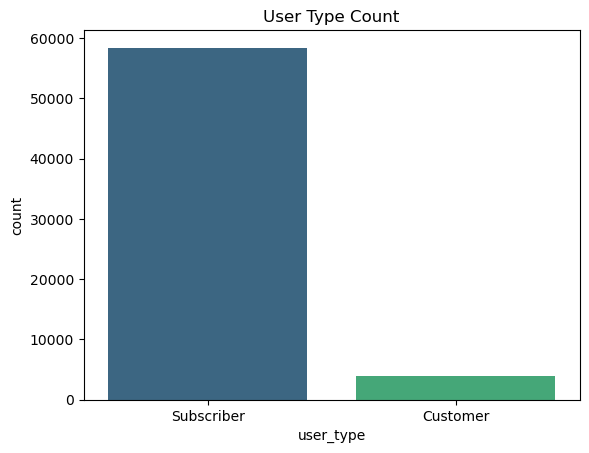

In [34]:
# Chart - 1 visualization code
sns.barplot(x='user_type',y='count',data=df['user_type'].value_counts().reset_index(),palette='viridis',hue='user_type')
plt.title("User Type Count")
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart effectively visualizes comparision between categories.

##### 2. What is/are the insight(s) found from the chart?

* Subscribers form majority of users and Customers form minority of users.
* Customer count is quite low in comparison, meaning fewer people are opting for casual or short-term usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Postive Impact**
* Higher subscriber count suggest strong brand loyality and stable revenue, which is good for business.

**Negative Impact**
* A low number of customers mean missed opportunity to bring new users.

#### Chart - 2

In [35]:
sub_df["member_gender"].value_counts().reset_index()

member_gender  count
0          Male  45850
1        Female  11958
2         Other    566

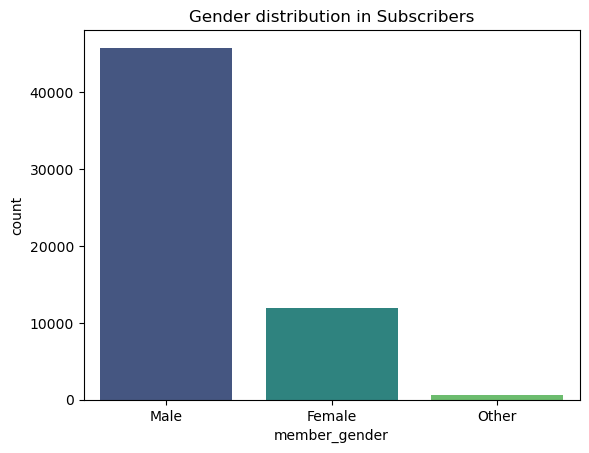

In [36]:
# Chart - 2 visualization code
sns.barplot(x='member_gender',y='count',data=sub_df["member_gender"].value_counts().reset_index(),palette='viridis',hue='member_gender')
plt.title("Gender distribution in Subscribers")
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart is best for compare discrete categories.

##### 2. What is/are the insight(s) found from the chart?

* Among subscribers , Male dominate heavily followed by small number of Females and others are extremely low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Since core audience are Male, they can tailor promotions and partnerships to appeal to this group.

**Negative Impact**
* Not enough gender diversity could limit growth potential.


#### Chart - 3

In [37]:
cus_df['member_gender'].value_counts().reset_index()

member_gender  count
0          Male   2572
1        Female   1333
2         Other     75

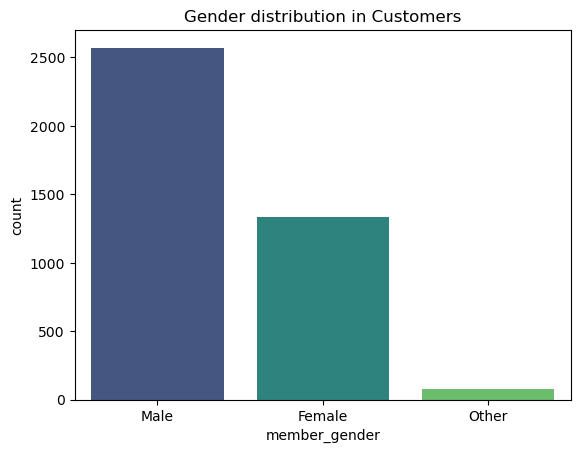

In [38]:
# Chart - 3 visualization code
sns.barplot(x='member_gender',y='count',data=cus_df['member_gender'].value_counts().reset_index(),palette='viridis',hue='member_gender')
plt.title("Gender distribution in Customers")
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart is best for compare discrete categories.

##### 2. What is/are the insight(s) found from the chart?

* Males are larger compared to females but the difference is much smaller than in subscribers.
* This indicate custoemrs are more gender-diverse compared to subscribers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Females are relatively higher in customers than in subscribers, showing potential to convert into subscribers.

**Negative Impact**
* Despite improvement among Customers, overall female participation is still lower.

#### Chart - 4

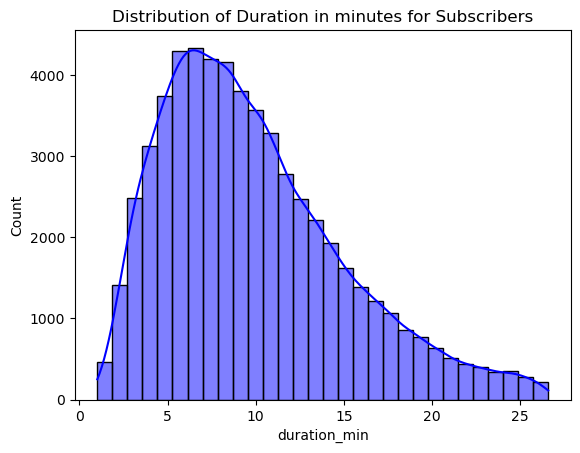

In [39]:
# Chart - 4 visualization code
sns.histplot(sub_df['duration_min'], bins=30, kde=True, color='blue')
plt.title("Distribution of Duration in minutes for Subscribers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Majority of subscribers trip duration is short.
* Sharp peak between 5-7 minutes and decline gradually.
* Distribution is right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Product offerings can be optimized for short rides.

**Negative Impact**
* Heavy focus on short trips could lead to undervaluing casual long-distance customers.

#### Chart - 5

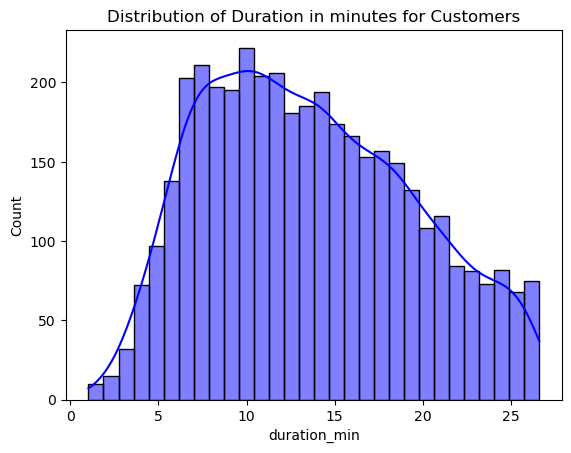

In [40]:
# Chart - 5 visualization code
sns.histplot(cus_df['duration_min'], bins=30, kde=True, color='blue')
plt.title("Distribution of Duration in minutes for Customers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Peak trip duration is around 8 to 12 minutes.
* The distribution is less sharply peaked compared to Subscribers — it's flatter and more spread out.
* There are still quite a few trips over 20 minutes, much more than Subscribers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Customers tend to ride longer, so offering flexible prices could attract more casual riders.

**Negative Impact**
* Bike availability could be a challenge if Customers hold bikes for longer durations, causing inventory shortages at high-demand stations.

#### Chart - 6

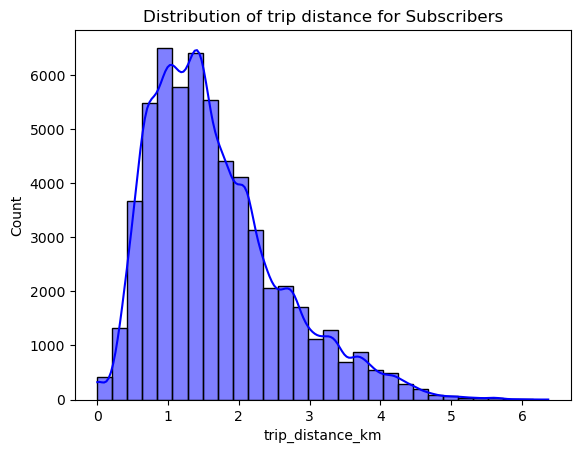

In [41]:
# Chart - 6 visualization code
sns.histplot(sub_df['trip_distance_km'], bins=30, kde=True, color='blue')
plt.title("Distribution of trip distance for Subscribers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Most Subscribers take trips around 1 to 2 kilometers.
* The distribution is heavily right-skewed (more short trips, fewer long ones).
* Very few trips go beyond 3-4 kilometers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Most trips are short maintaining high density of stations 
* Subscription plans that focus on unlimited short trips.

**Negative Impact**
* If pricing is based only on trip time and not distance, people taking longer routes with traffic (even if short in distance) might get frustrated.

#### Chart - 7

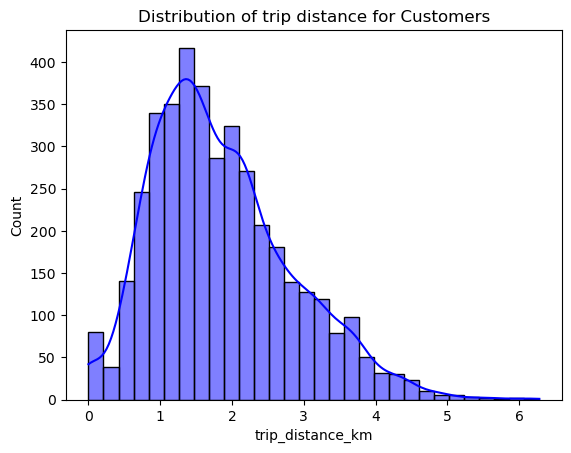

In [42]:
# Chart - 7 visualization code
sns.histplot(cus_df['trip_distance_km'], bins=30, kde=True, color='blue')
plt.title("Distribution of trip distance for Customers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Customers also mainly take trips around 1 to 2.5 km.
* There's a long tail towards trips around 4-5 km, slightly more compared to Subscribers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Occasional riders may prefer longer leisure rides compared to daily commuters.
* Offering day passes or hourly pricing options could attract Customers better.

**Negative Impact**
* If pricing penalties are too aggressive, it may discourage Customers from choosing your service for longer trips.

#### Chart - 8

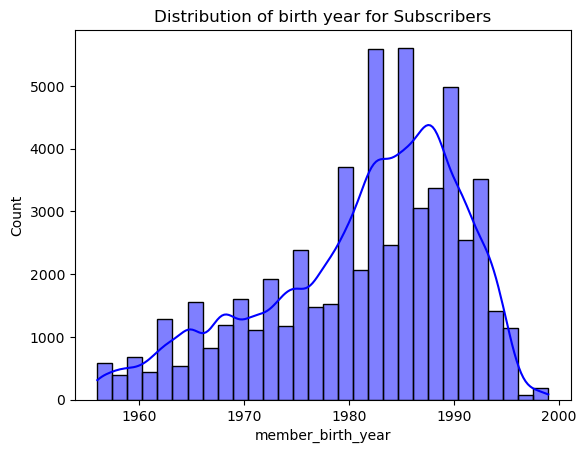

In [43]:
# Chart - 8 visualization code
sns.histplot(sub_df['member_birth_year'], bins=30, kde=True, color='blue')
plt.title("Distribution of birth year for Subscribers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Most subscribers were born between 1980 and 1995
* Very few older or very young individuals subscribe.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Bike reliability, quick rentals, and convenience are likely the most important selling points.

**Negative Impact**
* Not enough appeal for younger riders
* Not enough senior-friendly programs for those older than 60

#### Chart - 9

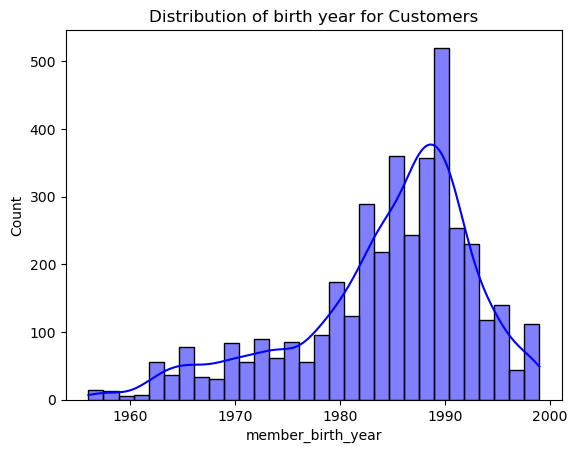

In [44]:
# Chart - 9 visualization code
sns.histplot(cus_df['member_birth_year'], bins=30, kde=True, color='blue')
plt.title("Distribution of birth year for Customers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Customers are slightly younger than Subscribers overall.
* Peak around 1988–1992.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Casual, one-time promotions can be targeted toward younger adults.
* Social media ads and app-based marketing could work well, as younger people are more digitally active.
* Potential to convert some of these younger customers to subscribers by offering starter plans.

**Negative Impact**
* Heavy reliance on younger users might mean lower loyalty.
*Need to continuously engage or risk losing them to competitors.



#### Chart - 10

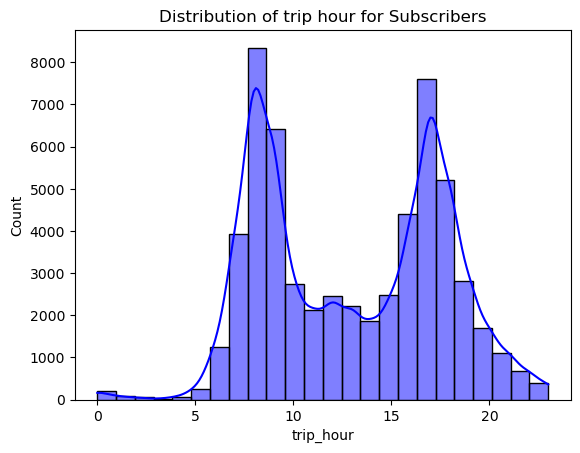

In [45]:
# Chart - 10 visualization code
sns.histplot(sub_df['trip_hour'], bins=24, kde=True, color='blue')
plt.title("Distribution of trip hour for Subscribers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* There are two strong peaks:

    * Morning peak: Around 8 AM.
    * Evening peak: Around 5–6 PM.

These peaks perfectly match office commute times when people ride to and from work.

* There's relatively less usage in the midday hours (11 AM – 3 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positve Impact**
* Priority maintenance of bikes and stations during off-peak hours can avoid downtime during rush hours.

**Negative Impact**
* High reliance on commuting patterns could mean lower usage on weekends or holidays.

* If station availability isn't balanced (empty/full), it could frustrate riders during critical commute times.

#### Chart - 11

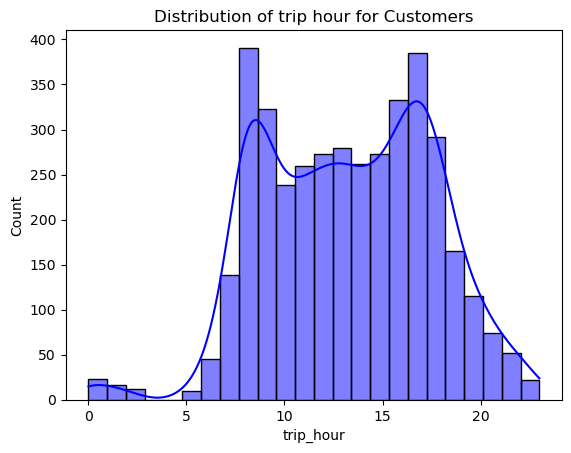

In [46]:
# Chart - 11 visualization code
sns.histplot(cus_df['trip_hour'], bins=24, kde=True, color='blue')
plt.title("Distribution of trip hour for Customers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Peak hours are from 8-9 AM and 5-6 PM
* After 8 PM, the no of trips sharply decline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
* Driver scheduling can be optimized to match peak demands and reduce idle time.

**Negative Impact**
* If vehicles or services are over-supplied during low-demand hours, it can increase operational costs without enough revenue.

#### Chart - 12

In [47]:
df.head()

start_station_name  \
6   17th & Folsom Street Park (17th St at Folsom St)   
7                                 Berry St at 4th St   
8                             Valencia St at 24th St   
11                        Division St at Potrero Ave   
12                    16th St Mission BART Station 2   

                                     end_station_name   user_type  \
6                              Valencia St at 24th St  Subscriber   
7                        4th St at Mission Bay Blvd S  Subscriber   
8                         Cyril Magnin St at Ellis St  Subscriber   
11  San Francisco Public Library (Grove St at Hyde...  Subscriber   
12                            Market St at Dolores St  Subscriber   

    member_birth_year member_gender bike_share_for_all_trip  duration_min  \
6                1988          Male                      No          7.55   
7                1980          Male                      No          3.00   
8                1987          Male                     Yes         16.60   
11               1993          Male                      No          7.20   
12               1957          Male                      No         10.02   

    trip_hour  trip_day  trip_month  trip_distance_km  
6          23        31           1              1.34  
7          23        31           1              0.63  
8          23        31           1              3.85  
11         23        31           1              1.29  
12         23        31           1              0.78

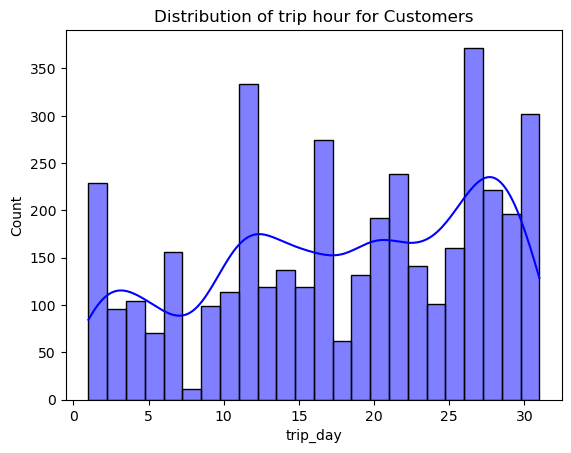

In [48]:
# Chart - 12 visualization code
sns.histplot(cus_df['trip_day'], bins=24, kde=True, color='blue')
plt.title("Distribution of trip hour for Customers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Trip activity is not consistent across all days of the month
* High peaks are seen around Day 1, Day 11–12, Day 16–17, Day 24–28, and Day 30–31.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**
*  Plan promotions or increase fleet size during high-activity days to meet extra demand.

**Negative Impact**
* Unexpected drop-offs mid-month could hurt cash flow predictions if not anticipated.

#### Chart - 13

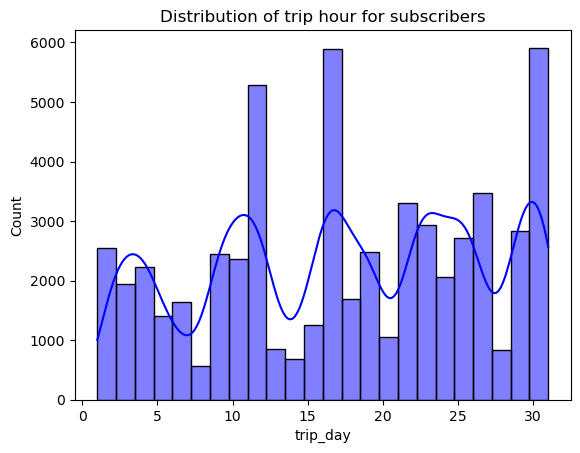

In [49]:
# Chart - 13 visualization code
sns.histplot(sub_df['trip_day'], bins=24, kde=True, color='blue')
plt.title("Distribution of trip hour for subscribers")
plt.show()

##### 1. Why did you pick the specific chart?

* Histogram is ideal for showing distributions of a continuous variable.
* Reveals patterns such as skewness, peak and spread.

##### 2. What is/are the insight(s) found from the chart?

* Trip volumes are way higer for subscribers compared to customers.
* Peaks around Day 11–12, Day 17–18, Day 24–25, and Day 30–31 very strong and regular.
* Sharp drops are visible around Day 6–8, Day 13–15, and Day 19–20.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Postive Impact**
* Targeting subscription renewals, loyalty rewards, or upgrades around peak usage days could lock in more value.

**Negative Impact**
* Sharp mid-month drop-offs indicate possible subscriber fatigue

#### Chart - 14

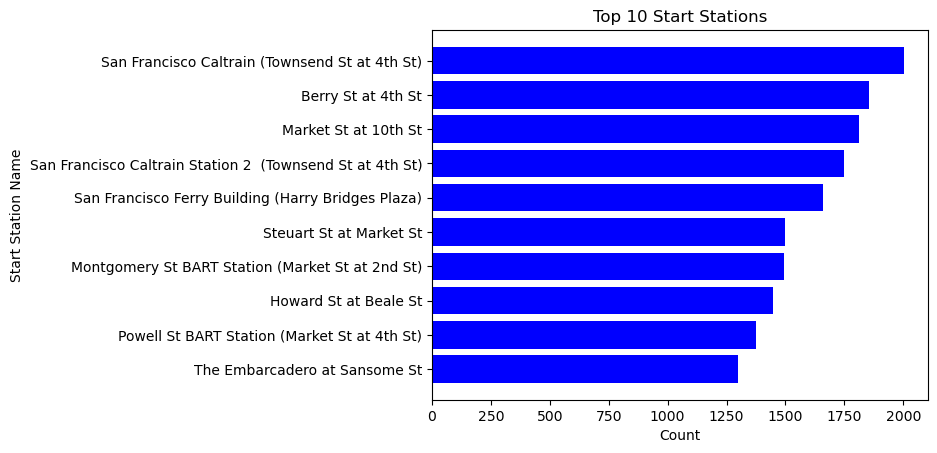

In [50]:
# Chart - 14 visualization code
top_start_station=top_start_station.sort_values(by='count',ascending=True)
plt.barh(top_start_station['start_station_name'], top_start_station['count'], color='blue')
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10 Start Stations')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart effectively visualizes comparision between categories.

##### 2. What is/are the insight(s) found from the chart?

* This shows the busiest stations where most of the people start their trip

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Postive Impact**
* Knowing popular start stations could help to provide more bikes ensuring sufficient bike availability for users and subscribers to improve satisfaction among them.

**Negative Impact**
* They should expand and provide servies in least popular stations to improve visibility and attract customers.

#### Chart - 15

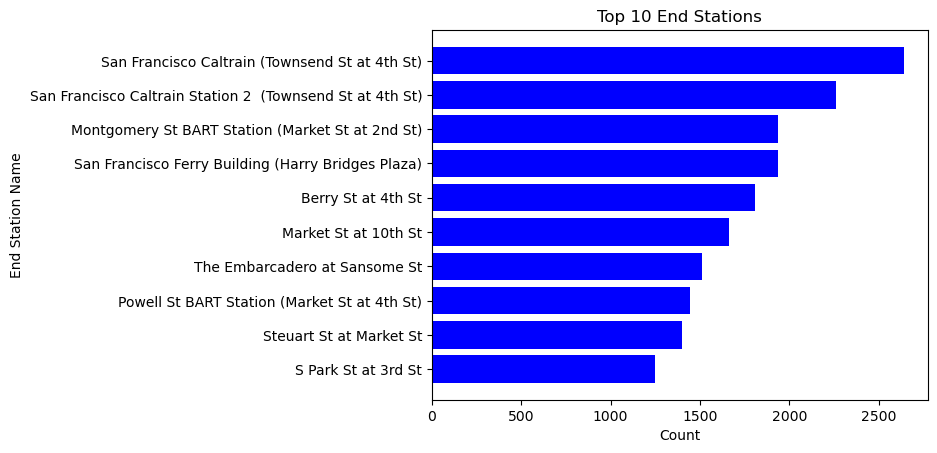

In [51]:
# Chart - 15 visualization code
top_end_station=top_end_station.sort_values(by='count',ascending=True)
plt.barh(top_end_station['end_station_name'], top_end_station['count'], color='blue')
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Top 10 End Stations')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart effectively visualizes comparision between categories.

##### 2. What is/are the insight(s) found from the chart?

* these shows where the customers end their trip

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Postive Impact**
* Helps in analyzing trip distance from these end stations.

#### Chart - 16 - Correlation Heatmap

In [52]:
df['member_gender']=df['member_gender'].replace({'Male':1,"Female":2,'Other':3})
df['user_type']=df['user_type'].replace({'Subscriber':1,'Customer':2})
df['bike_share_for_all_trip']=df['bike_share_for_all_trip'].replace({'Yes':1,'No':0})

/tmp/ipykernel_24780/889945514.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['member_gender']=df['member_gender'].replace({'Male':1,"Female":2,'Other':3})
/tmp/ipykernel_24780/889945514.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['user_type']=df['user_type'].replace({'Subscriber':1,'Customer':2})
/tmp/ipykernel_24780/889945514.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['start_station_name']=le.fit_transform(df['start_station_name'])
df['end_station_name']=le.fit_transform(df['end_station_name'])

df.head()

start_station_name  end_station_name  user_type  member_birth_year  \
6                    6               113          1               1988   
7                   30                21          1               1980   
8                  115                41          1               1987   
11                  45                97          1               1993   
12                   4                72          1               1957   

    member_gender  bike_share_for_all_trip  duration_min  trip_hour  trip_day  \
6               1                        0          7.55         23        31   
7               1                        0          3.00         23        31   
8               1                        1         16.60         23        31   
11              1                        0          7.20         23        31   
12              1                        0         10.02         23        31   

    trip_month  trip_distance_km  
6            1              1.34  
7            1              0.63  
8            1              3.85  
11           1              1.29  
12           1              0.78

In [54]:
df['trip_month'].value_counts()

trip_month
1    62354
Name: count, dtype: int64

In [55]:
df.drop(['trip_month'],axis=1,inplace=True)

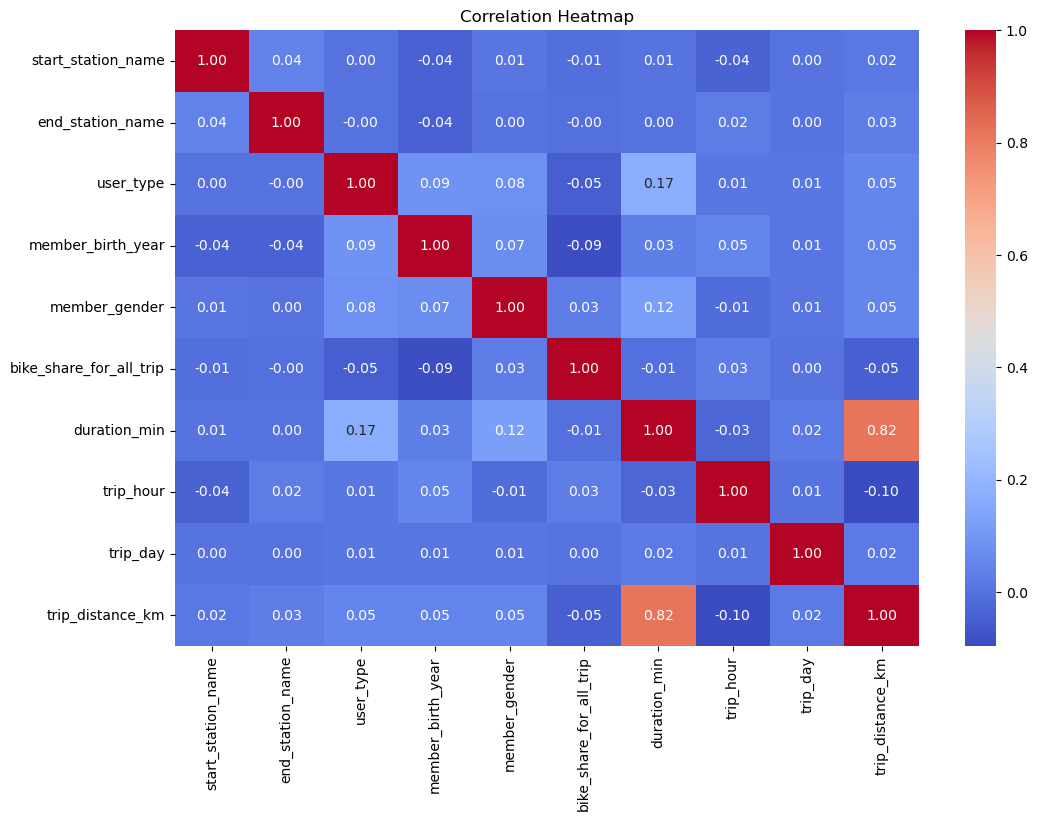

In [56]:
# Correlation Heatmap visualization code
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

* This correlation heatmap effectively shows the correlation between different features which helps us to understand the relationships between them.

##### 2. What is/are the insight(s) found from the chart?

**Strong Positive Correlation**
* duration_min and trip_distance_km have a high positive correlation (~0.82)

**Weak Correlation**
* Most other variables like trip_hour, trip_day, start_station_name, user_type, etc., show very weak or no correlation with each other

**Small Positive Correlation**
* user_type has a slight positive correlation (~0.17) with duration_min, meaning user type might influence how long trips last.

**Negative Correlations**
* Tiny negative relations exist (e.g., bike_share_for_all_trip and member_birth_year), but none are significant enough to act on directly.

#### Chart - 17 - Pair Plot

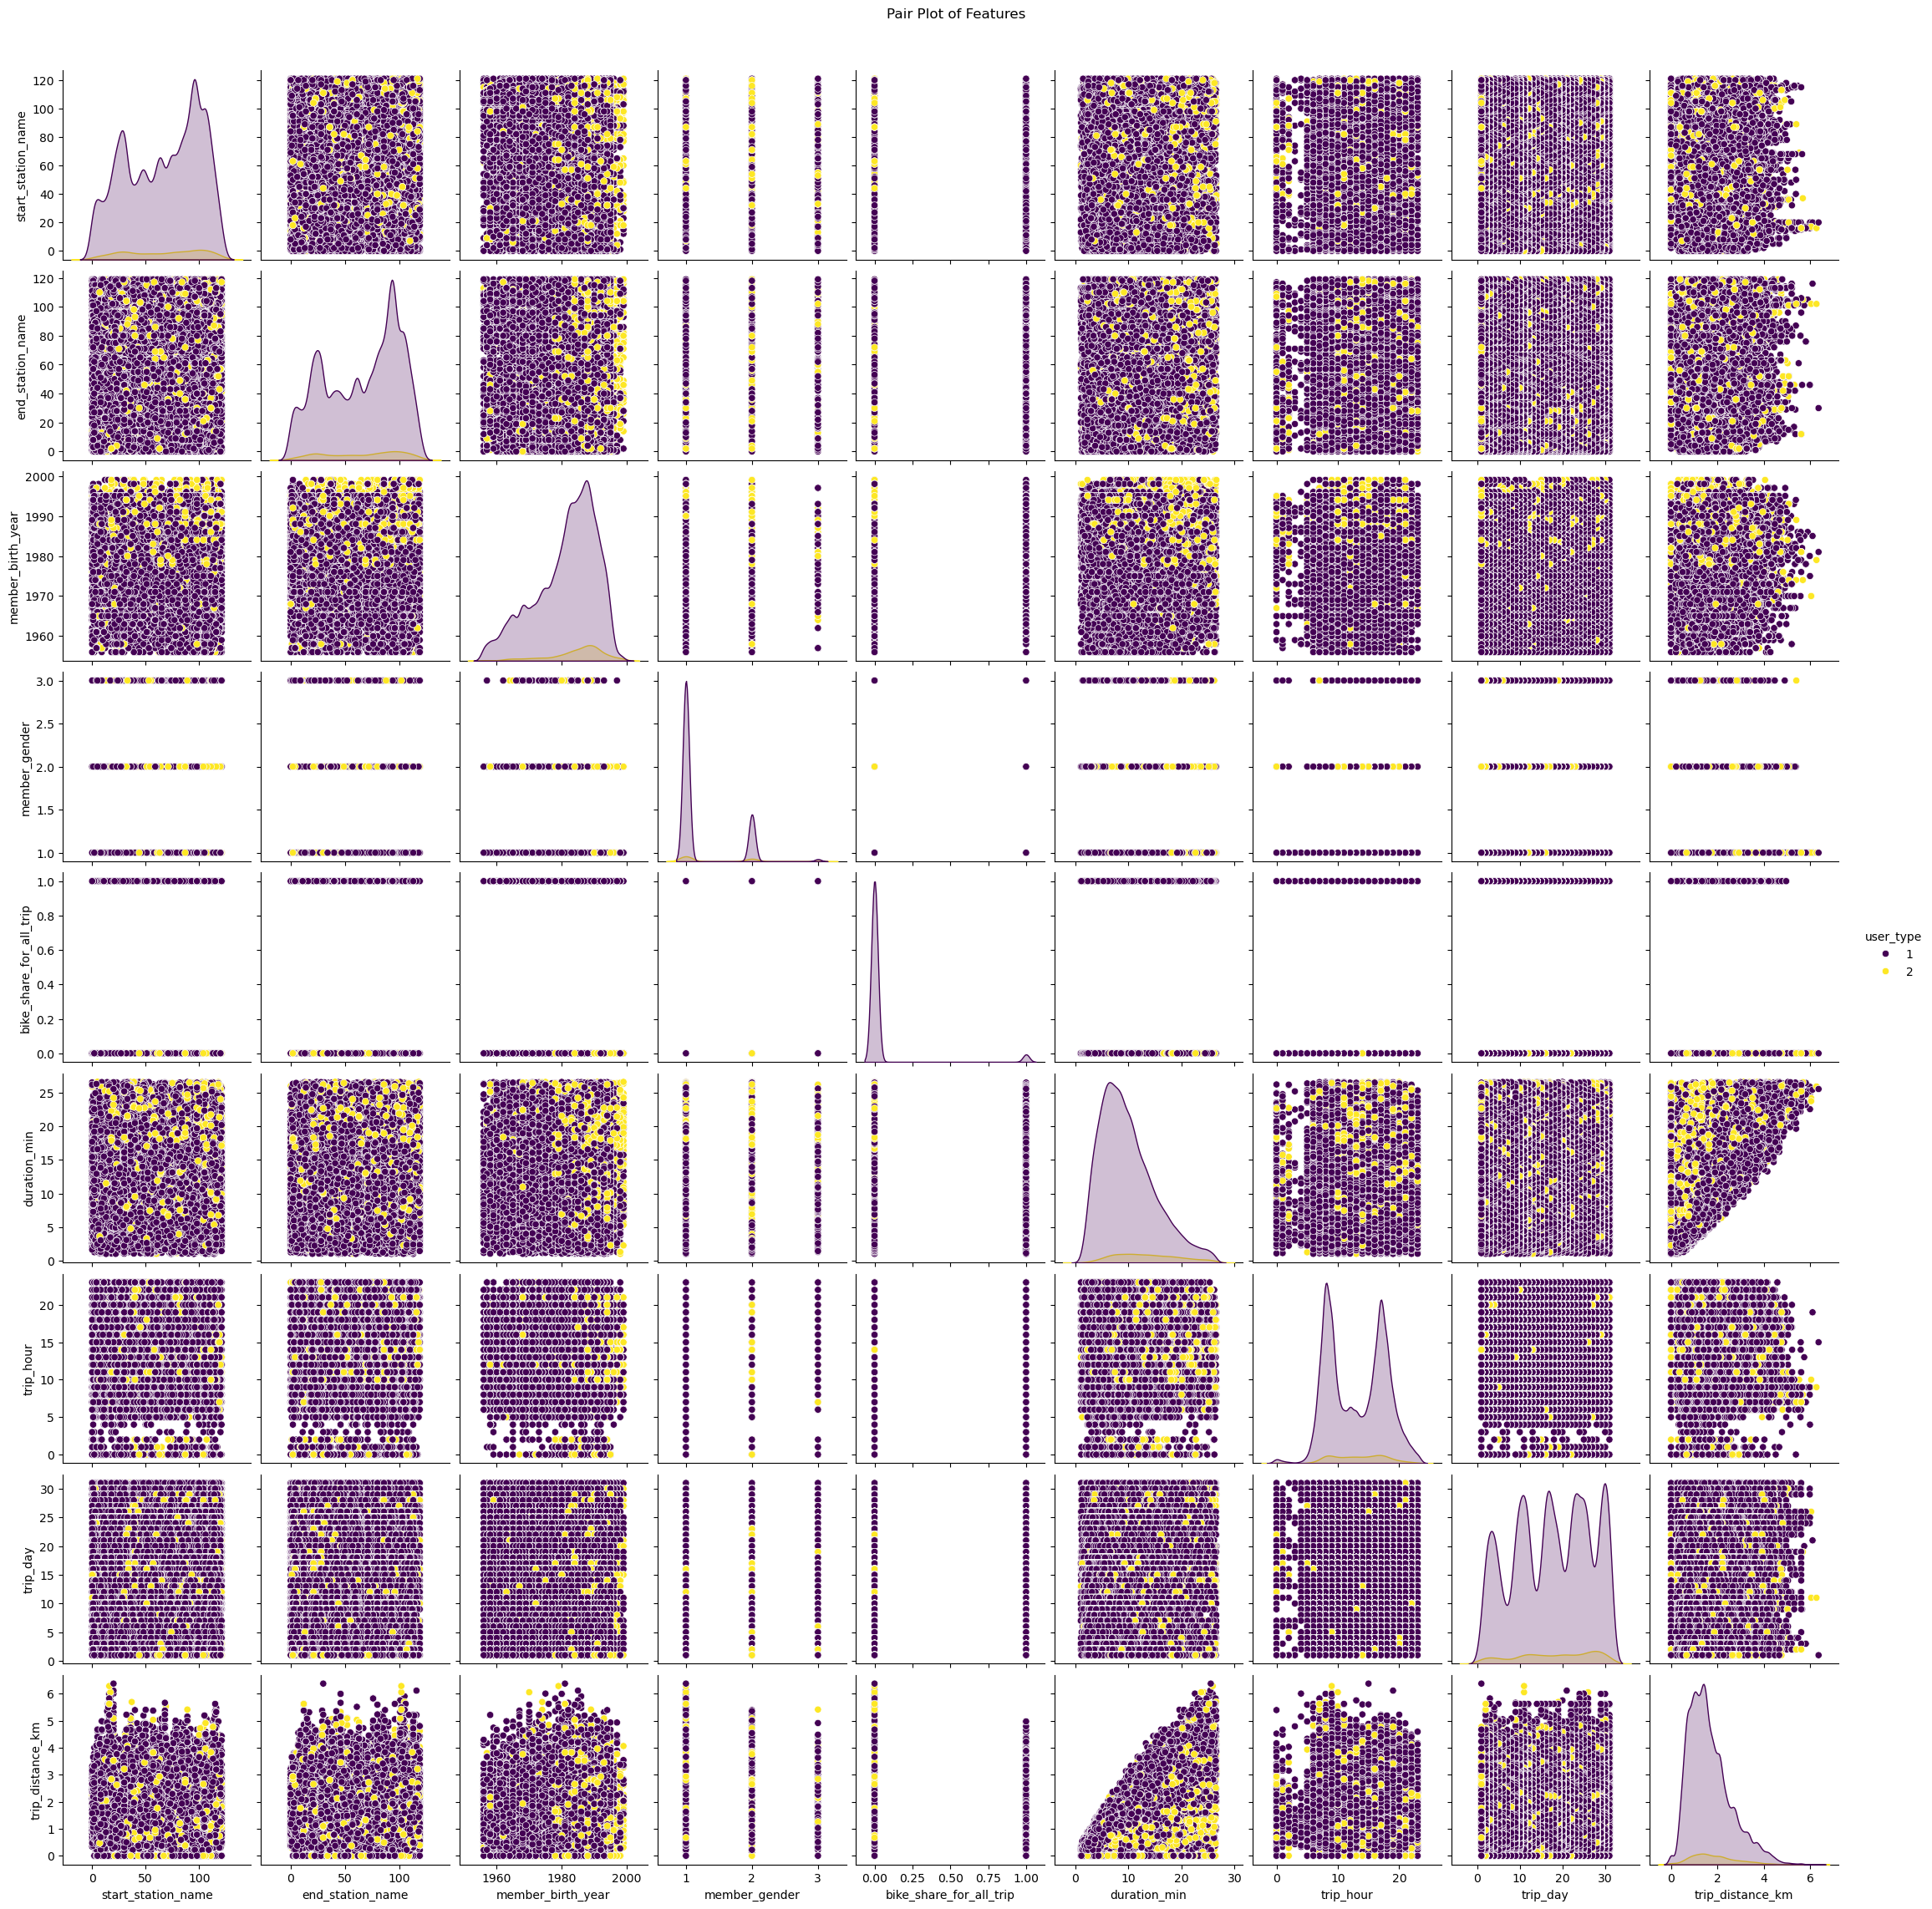

In [57]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde', hue='user_type', palette='viridis')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

* Pair plot helps to have different kinds of plots between features and gives an understand of the relationship between them

##### 2. What is/are the insight(s) found from the chart?

* duration_min vs trip_distance_km shows a strong, clear linear trend
* Subscribers tend to have shorter trips clustered, while Customers spread more widely.
* member_birth_year shows some clustering around specific years — indicating dominance of certain age groups

## **5. Solution to Problem Statement**

In [58]:
print("1. The average trip duration in minutes is: ")
print('For Subscribers:', sub_df['duration_min'].mean())
print('For Customers:', cus_df['duration_min'].mean(), '\n')


print('''2. Based on the data, all trips start on the same month, January.
      which is insufficient to determine the effect on duration of trip.''',"\n")

print("3. The average trip distance in km is: ")
print('For Subscribers:', sub_df['trip_distance_km'].mean())
print('For Customers:', cus_df['trip_distance_km'].mean(), '\n')
print("Since the average trip duration & distance varies for both user types, they both depend on the user type")

1. The average trip duration in minutes is: 
For Subscribers: 9.855562065303046
For Customers: 13.56278391959799 

2. Based on the data, all trips start on the same month, January.
      which is insufficient to determine the effect on duration of trip. 

3. The average trip distance in km is: 
For Subscribers: 1.6560525233836982
For Customers: 1.8489170854271355 

Since the average trip duration & distance varies for both user types, they both depend on the user type
